In [1]:
from neuralforecast import NeuralForecast
from neuralforecast.models import NBEATS
from neuralforecast.utils import AirPassengersDF

import pandas as pd
import matplotlib.pyplot as plt

from neuralforecast import NeuralForecast
from neuralforecast.models import LSTM
from neuralforecast.losses.pytorch import DistributionLoss
from neuralforecast.utils import AirPassengersPanel, AirPassengersStatic

### NBEATS 

In [2]:
nf = NeuralForecast(models=[NBEATS(input_size=24, h=12, max_steps=100)], freq="M")

nf.fit(df=AirPassengersDF)
nf.predict()

Seed set to 1
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name         | Type          | Params | Mode 
-------------------------------------------------------
0 | loss         | MAE           | 0      | train
1 | padder_train | ConstantPad1d | 0      | train
2 | scaler       | TemporalNorm  | 0      | train
3 | blocks       | ModuleList    | 2.4 M  | train
-------------------------------------------------------
2.4 M     Trainable params
900       Non-trainable params
2.4 M     Total params
9.789     Total estimated model params size (MB)
31        Modules in train mode
0         Modules in eval mode


Epoch 99: 100%|██████████| 1/1 [00:00<00:00,  1.82it/s, v_num=0, train_loss_step=9.140, train_loss_epoch=9.140]

`Trainer.fit` stopped: `max_steps=100` reached.


Epoch 99: 100%|██████████| 1/1 [00:00<00:00,  1.78it/s, v_num=0, train_loss_step=9.140, train_loss_epoch=9.140]


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 11.26it/s]


c:\Users\Max\anaconda3\envs\py310\lib\site-packages\neuralforecast\core.py:209: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


,ds,NBEATS
unique_id,,
1.0,1961-01-31,446.365234
1.0,1961-02-28,422.747009
1.0,1961-03-31,488.973236
1.0,1961-04-30,497.768921
1.0,1961-05-31,513.739197
1.0,1961-06-30,580.559998
1.0,1961-07-31,674.919678
1.0,1961-08-31,664.525696
1.0,1961-09-30,574.043457


### LSTM 

#### Set dataframe

In [4]:
Y_train_df = AirPassengersPanel[
    AirPassengersPanel.ds < AirPassengersPanel["ds"].values[-12]
]  # 132 train
Y_test_df = AirPassengersPanel[
    AirPassengersPanel.ds >= AirPassengersPanel["ds"].values[-12]
].reset_index(
    drop=True
)  # 12 test

### Fit model

In [50]:
nf = NeuralForecast(
    models=[
        LSTM(
            h=12,
            input_size=-1,
            loss=DistributionLoss(distribution="Normal", level=[80, 90]),
            scaler_type="robust",
            encoder_n_layers=2,
            encoder_hidden_size=128,
            context_size=10,
            decoder_hidden_size=128,
            decoder_layers=2,
            max_steps=200,
            futr_exog_list=["y_[lag12]"],
            stat_exog_list=["airline1"],
        )
    ],
    freq="M",
)

## Model fit
nf.fit(df=Y_train_df, static_df=AirPassengersStatic)

## Get Predictions
Y_hat_df = nf.predict(futr_df=Y_test_df)
Y_hat_df

Seed set to 1
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | loss            | DistributionLoss | 5      | train
1 | padder          | ConstantPad1d    | 0      | train
2 | scaler          | TemporalNorm     | 0      | train
3 | hist_encoder    | LSTM             | 199 K  | train
4 | context_adapter | Linear           | 16.9 K | train
5 | mlp_decoder     | MLP              | 1.8 K  | train
-------------------------------------------------------------
218 K     Trainable params
5         Non-trainable params
218 K     Total params
0.874     Total estimated model params size (MB)
11        Modules in train mode
0         Modules in eval mode


Epoch 199: 100%|██████████| 1/1 [00:00<00:00, 21.53it/s, v_num=10, train_loss_step=3.910, train_loss_epoch=3.910] 

`Trainer.fit` stopped: `max_steps=200` reached.


Epoch 199: 100%|██████████| 1/1 [00:00<00:00, 21.53it/s, v_num=10, train_loss_step=3.910, train_loss_epoch=3.910]


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00,  3.52it/s]


c:\Users\Max\anaconda3\envs\py310\lib\site-packages\neuralforecast\core.py:209: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


,ds,LSTM,LSTM-median,LSTM-lo-90,LSTM-lo-80,LSTM-hi-80,LSTM-hi-90
unique_id,,,,,,,
Airline1,1960-01-31,367.458405,367.962036,342.081665,347.126404,387.203186,392.439880
Airline1,1960-02-29,347.361664,347.126953,322.772919,327.887238,367.655609,373.692169
Airline1,1960-03-31,411.624176,411.437195,386.863983,391.668030,431.742310,438.034241
Airline1,1960-04-30,399.513947,399.706055,373.577667,379.261993,418.880188,425.954376
Airline1,1960-05-31,433.035004,433.522308,405.768799,412.769043,451.776489,458.004181
Airline1,1960-06-30,485.472473,484.927216,458.540161,466.074768,506.313507,511.867889
Airline1,1960-07-31,584.562805,584.618408,558.213440,564.057556,604.208191,610.081360
Airline1,1960-08-31,599.338379,598.982666,571.974304,577.401611,622.299744,628.559387
Airline1,1960-09-30,495.765503,495.107178,469.159210,475.975922,516.285828,522.300842


### Accuracy Metrics

In [54]:
import numpy as np

# Extract actual values
y_true = Y_test_df["y"].values

# Extract predicted values
y_pred = Y_hat_df["LSTM"].values

# Calculate Mean Absolute Error (MAE)
mae = np.mean(np.abs(y_true - y_pred))

# Calculate Mean Absolute Percentage Error (MAE)
mape = np.mean(np.abs((y_true - y_pred) / (y_true))) * 100

# Calculate Mean Squared Error (MSE)
mse = np.mean((y_true - y_pred) ** 2)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Print metrics including MAPE
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Mean Absolute Error (MAE): 27.59
Mean Squared Error (MSE): 1174.94
Root Mean Squared Error (RMSE): 34.28
Mean Absolute Percentage Error (MAPE): 4.73%


### Plot results

In [55]:
Y_hat_df = Y_hat_df.reset_index(drop=False).drop(columns=["unique_id", "ds"])

[]

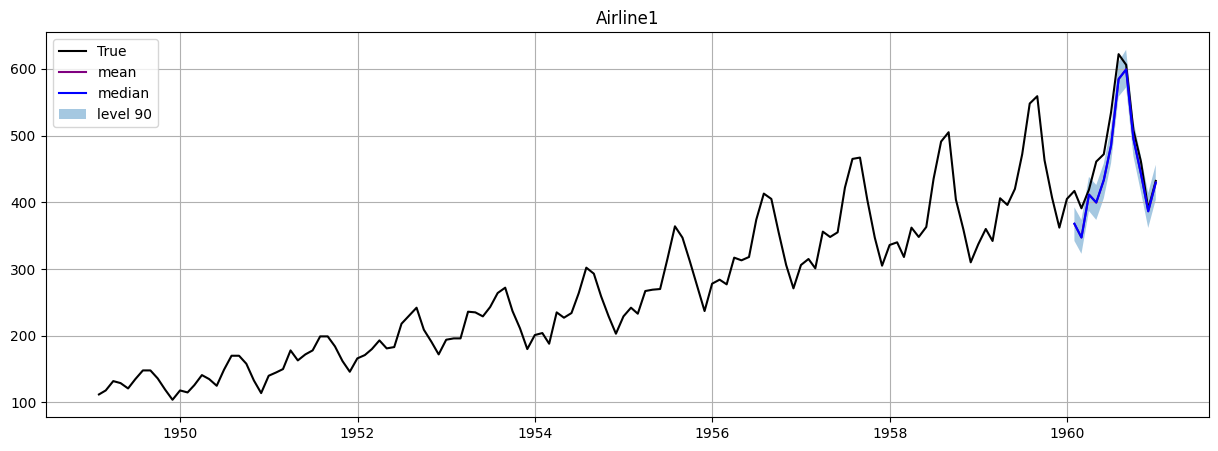

In [56]:
plot_df = pd.concat([Y_test_df, Y_hat_df], axis=1)
plot_df = pd.concat([Y_train_df, plot_df])

plot_df = plot_df[plot_df.unique_id == "Airline1"].drop("unique_id", axis=1)

plt.figure(figsize=(15, 5))
plt.plot(plot_df["ds"], plot_df["y"], c="black", label="True")
plt.plot(plot_df["ds"], plot_df["LSTM"], c="purple", label="mean")
plt.plot(plot_df["ds"], plot_df["LSTM-median"], c="blue", label="median")
plt.fill_between(
    x=plot_df["ds"][-12:],
    y1=plot_df["LSTM-lo-90"][-12:].values,
    y2=plot_df["LSTM-hi-90"][-12:].values,
    alpha=0.4,
    label="level 90",
)
plt.legend()
plt.grid()
plt.title("Airline1")
plt.plot()